In [1]:
# Importing Libraries
import os
import librosa
import soundfile
import torch

import numpy as np
import matplotlib.pyplot as plt
import librosa.display

from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms


/home/hoangngominh98/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libc10_cuda.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [2]:
from sklearn import preprocessing

def extract_features_song_get_means(song):
    print(song)
    y, _ = librosa.load(song)

    # get Mel-frequency cepstral coefficients
    #print(y.shape)
    #sample = 2000000
    #mfcc = librosa.feature.mfcc(y = y[:sample])
    # normalize values between -1,1 (divide by max)
    #mfcc /= np.amax(np.absolute(mfcc))
    
    magnitude = np.abs(librosa.stft(y))
    mel_spec = librosa.feature.melspectrogram(S = magnitude**2)
    mfcc = librosa.feature.mfcc(S = librosa.power_to_db(mel_spec))
    chroma = librosa.feature.chroma_stft(S = magnitude)
    
    mean_mfcc = np.mean(mfcc, axis=1)
    mean_mel_spec = np.mean(mel_spec, axis=1)
    mean_chroma = np.mean(chroma, axis=1)
    cov_mfcc = np.ndarray.flatten(np.cov(mfcc))
    cov_mel_spec = np.ndarray.flatten(np.cov(mel_spec))
    cov_chroma = np.ndarray.flatten(np.cov(chroma))
    
    mean_mfcc = preprocessing.normalize([mean_mfcc])
    mean_mel_spec = preprocessing.normalize([mean_mel_spec])
    mean_chroma = preprocessing.normalize([mean_chroma])
    cov_mfcc = preprocessing.normalize([cov_mfcc])
    cov_mel_spec = preprocessing.normalize([cov_mel_spec])
    cov_chroma = preprocessing.normalize([cov_chroma])
    
    mean_mfcc = mean_mfcc.reshape((mean_mfcc.shape[1],))
    mean_mel_spec = mean_mel_spec.reshape((mean_mel_spec.shape[1],))
    mean_chroma = mean_chroma.reshape((mean_chroma.shape[1],))
    cov_mfcc = cov_mfcc.reshape((cov_mfcc.shape[1],))
    cov_mel_spec = cov_mel_spec.reshape((cov_mel_spec.shape[1],))
    cov_chroma = cov_chroma.reshape((cov_chroma.shape[1],))
    # tempo, beat_frames = librosa.beat.beat_track(y = snippet, sr = sr)
    # cq_chroma = librosa.feature.chroma_cqt(y = snippet, sr = sr)
    # onset_env = librosa.onset.onset_strength(y = snippet, sr=sr)
    features = np.concatenate((mean_mel_spec, mean_mfcc, mean_chroma, cov_mel_spec, cov_mfcc, cov_chroma), axis=0)
    print(features.shape)
    return np.ndarray.flatten(features)

In [3]:
import glob
# Prepare a list for all the features and all the labels
all_features = []
all_labels = []

#genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
genres_path = "Prog_Dataset/"
genres = ["Progressive", 'Non_Progressive/Top_Of_The_Pops', 'Non_Progressive/Other_Songs']
# Extract features and genre names from each song
for genre in genres:
    sound_files = glob.glob(genres_path + genre + '/*')
    #print(sound_files)
    print('Processing %d songs in %s genre...' % (len(sound_files), genre))
    for i, song in enumerate(sound_files):
        if (song[-3:] == 'csv') or (song[-3:] == 'ods'):
            continue
        # Handle corrupt song 
        if 'jazz.00054.wav' in song:
            features = extract_features_song_get_means(sound_files[i - 1])
        else:
            features = extract_features_song_get_means(song)

        all_features.append(features)
        if genre == 'Progressive':
            all_labels.append(0)
        else:
            all_labels.append(1)

Processing 142 songs in Progressive genre...
Prog_Dataset/Progressive/01. The Same River.mp3
(17088,)
Prog_Dataset/Progressive/Pain of Salvation - The Perfect Element I - 02. In the Flesh.mp3
(17088,)
Prog_Dataset/Progressive/06. Anekdoten - Our Days Are Numbered.mp3
(17088,)
Prog_Dataset/Progressive/02. The Road Of Bones.mp3
(17088,)
Prog_Dataset/Progressive/01_Genesis_Watcher of the Skies.mp3
(17088,)
Prog_Dataset/Progressive/La conquista della posizione eretta.mp3
(17088,)
Prog_Dataset/Progressive/Kraftwerk - 01 - Autobahn.mp3
(17088,)
Prog_Dataset/Progressive/02 - Odyssey.mp3
(17088,)
Prog_Dataset/Progressive/01-The Bryden 2-Step (For Amphibians), Pt.1.mp3
(17088,)
Prog_Dataset/Progressive/01 - Phaedra.mp3
(17088,)
Prog_Dataset/Progressive/08 - Octavarium.mp3
(17088,)
Prog_Dataset/Progressive/05_Arriving Somewhere but Not Here.mp3
(17088,)
Prog_Dataset/Progressive/Kansas_08_Magnum_Opus.mp3


Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 20630146.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(17088,)
Prog_Dataset/Progressive/Baris_Manco_Bay_Koca_Destani_2023.mp3
(17088,)
Prog_Dataset/Progressive/05_Schism.mp3
(17088,)
Prog_Dataset/Progressive/12 - The Garden.mp3
(17088,)
Prog_Dataset/Progressive/03_Anesthetize.mp3
(17088,)
Prog_Dataset/Progressive/01-Zarathustra.mp3
(17088,)
Prog_Dataset/Progressive/Procol_Harum_In_Held.mp3
(17088,)
Prog_Dataset/Progressive/105-emerson_lake_and_palmer-karn_evil_9_1st_impression_(part_1).mp3
(17088,)
Prog_Dataset/Progressive/Appena un poco.mp3
(17088,)
Prog_Dataset/Progressive/01-genesis-dancing_with_the_moonlit_knight.mp3
(17088,)
Prog_Dataset/Progressive/Syzygy_Dialectic.mp3
(17088,)
Prog_Dataset/Progressive/05. Part V.mp3
(17088,)
Prog_Dataset/Progressive/05-Nine Feet Underground.mp3
(17088,)
Prog_Dataset/Progressive/(Disc 2) 01 - Telepathic Minds.mp3
(17088,)
Prog_Dataset/Progressive/05 - Starless.mp3
(17088,)
Prog_Dataset/Progressive/103 Epitaph.mp3
(17088,)
Prog_Dataset/Progressive/03 - Halleluwah.mp3
(17088,)
Prog_Dataset/Progressive

[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Progressive/06 - Ultimo Entardecer.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Progressive/01 - Songs From The Wood (2003 Digital Remaster).mp3
(17088,)
Prog_Dataset/Progressive/01_Yours Is No Disgrace.mp3
(17088,)
Prog_Dataset/Progressive/01-The runaway.mp3
(17088,)
Prog_Dataset/Progressive/01 - Luminol.mp3
(17088,)
Prog_Dataset/Progressive/01_Shine On You Crazy Diamond I.mp3
(17088,)
Prog_Dataset/Progressive/08 - Kingdom Of Dreams.mp3
(17088,)
Prog_Dataset/Progressive/03. Omen.mp3
(17088,)
Prog_Dataset/Progressive/05 Soup.mp3
(17088,)
Prog_Dataset/Progressive/08. Guardian.mp3
(17088,)
Prog_Dataset/Progressive/01 Peaches En Regalia.mp3
(17088,)
Prog_Dataset/Progressive/5 A Sprinkling Of Clouds.mp3
(17088,)
Prog_Dataset/Progressive/09 Heart Of The Sunrise.mp3
(17088,)
Prog_Dataset/Progressive/01_-_the_revealing_science_of_god_-_dance_of_the_dawn_320_lame_cbr.mp3
(17088,)
Prog_Dataset/Progressive/05_The_Afternoon_a_Afternoon_b_Evening.mp3
(17088,)
Prog_Dataset/Progressive/05. When the Water Breaks.mp3
(17088,)
Prog_Dataset/Progressive/Opeth -

[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Progressive/04-Stranger In Your Soul_Resampled.mp3
(17088,)
Prog_Dataset/Progressive/01. Vert.mp3
(17088,)
Prog_Dataset/Progressive/02_Dogs.mp3
(17088,)
Prog_Dataset/Progressive/03 A Plague of Lighthouse Keepers.mp3
(17088,)
Prog_Dataset/Progressive/The Flower Kings - 1997 Stardust We Are CD2 - 11 - Stardust We Are.mp3
(17088,)
Prog_Dataset/Progressive/07 - Zartlicher Abschied.mp3
(17088,)
Prog_Dataset/Progressive/03_YYZ_Rush_Moving_Pictures_Deluxe_Edition_2011.mp3
(17088,)
Prog_Dataset/Progressive/04_La_Villa_Strangiato_Rush_Hemispheres_Deluxe_Edition.mp3
(17088,)
Prog_Dataset/Progressive/05 Red Shift.mp3
(17088,)
Prog_Dataset/Progressive/08-This Strange Engine.mp3
(17088,)
Prog_Dataset/Progressive/08 - Lady Fantasy.mp3
(17088,)
Prog_Dataset/Progressive/01 - School.mp3
(17088,)
Prog_Dataset/Progressive/03 - Suenos De Maniqui.mp3
(17088,)
Prog_Dataset/Progressive/01.A passion play 1.mp3
(17088,)
Prog_Dataset/Progressive/01 - Roundabout.mp3
(17088,)
Prog_Dataset/Pr

[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Progressive/Frances the Mute-The Mars Volta-05-Cassandra Geminni 1.mp3
(17088,)
Prog_Dataset/Progressive/06-king_crimson-larks_tounges_in_aspic_(part_ii).mp3
(17088,)
Prog_Dataset/Progressive/07 A Louse Is Not A Home.mp3
(17088,)
Prog_Dataset/Progressive/01 - Birds of Fire.mp3
(17088,)
Prog_Dataset/Progressive/101 21st Century Schizoid Man.mp3
(17088,)
Prog_Dataset/Progressive/05 - Vivaldi.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Progressive/01-hymn_of_the_seventh_galaxy_320_lame_cbr.mp3
(17088,)
Prog_Dataset/Progressive/Big Big Train - English Electric (Part Two) - 01 - East Coast Racer.mp3
(17088,)
Prog_Dataset/Progressive/09 - Headlong Flight.mp3
(17088,)
Prog_Dataset/Progressive/04 Black Rose Immortal.mp3
(17088,)
Prog_Dataset/Progressive/01_-_ace_of_wands_320_lame_cbr.mp3
(17088,)
Prog_Dataset/Progressive/02 Scorched Earth.mp3
(17088,)
Prog_Dataset/Progressive/04 - The River Under.mp3
(17088,)
Prog_Dataset/Progressive/5  The architect.mp3
(17088,)
Prog_Dataset/Progressive/09 - Ice (Remastered 2023).mp3
(17088,)
Prog_Dataset/Progressive/103 Moon In June.mp3
(17088,)
Prog_Dataset/Progressive/02 Can You Understand.mp3
(17088,)
Prog_Dataset/Progressive/12-animals_as_leaders-song_of_solomon.mp3
(17088,)
Prog_Dataset/Progressive/02. Bleed (live).mp3
(17088,)
Prog_Dataset/Progressive/4 Foxlight.mp3
(17088,)
Prog_Dataset/Progressive/04Billy Cobham - Stratus.mp3
(17088,)
Prog_Dataset/Progressi

[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Progressive/13 - A Day in the Life.mp3
(17088,)
Processing 87 songs in Non_Progressive/Top_Of_The_Pops genre...
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2001_Train_Drops_Of_Jupiter.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1945_Harry_James_and_Kitty_Kallen_It_s_Been_A_Long_Long_Time.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2021_Silk_Sonic_Leave_the_Door_Open.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1965_Beach_Boys_California_Girls.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2008_Alicia_Keys_No_One.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1958_The_Champs_Tequila.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2007_Fergie_Big_Girls_Don_t_Cry.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1964_The_Beatles_I_Want_To_Hold_Your_Hand.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1960_Bryan_Hyland_Itsy_Bitsy.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2003_Evanescence_Bring_Me_To_Life.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1966_The_Rolling_Stones_Paint_It_Black.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2023_Morgan_Wallen_Last_Night.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2012_Taylor_Swift_We_Are_Never_Getting_Back_Together.mp3


Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 7797061.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1978_Bee_Gees_Night_Fever.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1976_Eagles_Hotel_California.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1977_ABBA_Dancing_Queen.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2011_Adele_Rolling_In_The_Deep.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2020_BTS_Dynamite.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2002_Linkin_Park_In_The_End.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1980_Pink_Floyd_Another_Brick_In_The_Wall_Part_II.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1989_Milli_Vanilli_Girl_You_Know_It_s_True.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1992_Nirvana_Smells_Like_Teen_Spirit.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1996_Alanis_Morissette_Ironic.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2022_Kendrick_Lamar_Beth_Gibbons_Mother_I_Sober.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2004_Usher_Yeah.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1955_Bill_Haley_And_His_Comets_Rock_Around_The_Clock.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1973_Diana_Ross_Touch_Me_In_The_Morning.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1940_Tommy_Dorsey_I_ll_Never_Smile_Again.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2009_Beyonce_Single_Ladies_Put_A_Ring_On_It.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1986_Mr._Mister_Broken_Wings.mp3


Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 8066079.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1997_The_Verve_Bittersweet_Symphony.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1998_Celine_Dion_My_Heart_Will_Go_On.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1967_The_Doors_Light_My_Fire.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2005_Kelly_Clarkson_Since_U_Been_Gone.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1942_Kay_Kyser_Praise_the_Lord_and_Pass_the_Ammunition.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1962_Ray_Charles_I_Can_t_Stop_Loving_You.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1993_Snap_Rhythm_Is_A_Dancer.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1949_Vaughan_Monroe_Riders_In_The_Sky.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1943_Duke_Ellington_In_A_Sentimental.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1982_Foreigner_Waiting_For_A_Girl_Like_You.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1983_Police_Every_Breath_You_Take.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1994_Ace_Of_Base_All_That_She_Wants.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2010_Lady_Gaga_Telephone.mp3


Note: Illegal Audio-MPEG-Header 0x00000000 at offset 5460065.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1952_Vera_Lynn_Auf_Wiederseh`n_Sweetheart.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2014_Katy_Perry_Roar.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1969_Neil_Diamond_Sweet_Caroline.mp3


Note: Illegal Audio-MPEG-Header 0x00544147 at offset 3412749.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1968_Steppenwolf_Born_To_Be_Wild.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1953_Les_Paul_And_Mary_Ford_Vaya_Con_Dios.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1957_Harry_Belafonte_Banana_Boat_Song.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1971_Rod_Stewart_Maggie_May.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1981_Kim_Carnes_Bette_Davis_Eyes.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2000_Sting_Desert_Rose.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1954_Rosemary_Clooney_Hey_There.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1948_Peggy_Lee_Manana.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1970_Simon_and_Garfunkel_Bridge_Over_Troubled_Water.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1999_Britney_Spears_...Baby_One_More_Time.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1974_Jackson_5_Dancin

[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?
Note: Illegal Audio-MPEG-Header 0x42696c6c at offset 3302120.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1991_Mariah_Carey_Someday.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2019_Ariana_Grande_Thank_U,_Next.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1979_The_Knack_My_Sharona.mp3


[src/libmpg123/layer3.c:INT123_do_layer3():1801] error: dequantization failed!
Note: Illegal Audio-MPEG-Header 0x4f09842e at offset 3049050.
Note: Trying to resync...
Note: Skipped 1024 bytes in input.
[src/libmpg123/parse.c:wetwork():1365] error: Giving up resync after 1024 bytes - your stream is not nice... (maybe increasing resync limit could help).
/tmp/ipykernel_3468638/3771222143.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, _ = librosa.load(song)
/home/hoangngominh98/anaconda3/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2017_Migos_Bad_&_Boujee.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1995_Hootie_And_The_Blowfish_Hold_My_Hand.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1956_Elvis_Presley_Heartbreak_Hotel.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1947_Francis_Craig_and_His_Orchestra_Near_You.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1946_Perry_Como_Prisoner_of_Love.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2015_Rihanna_FourFiveSeconds.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1987_Heart_Alone.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1985_Wham_Careless_Whisper.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1963_Peter_Paul_And_Mary_Puff_The_Magic_Dragon.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1941_Glenn_Miller_Chatanooga_Choo_Choo.mp3


Note: Illegal Audio-MPEG-Header 0x00000000 at offset 2806046.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1930_Josephine_Baker_J`ai_Deux_Amours.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2013_Bruno_Mars_Locked_Out_Of_Heaven.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2018_Drake_God_s_Plan.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1959_Johnny_Horton_The_Battle_Of_New_Orleans.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2006_Kanye_West_Gold_Digger.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1975_America_Sister_Golden_Hair.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1944_Les_Brown_Twilight_Time.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1951_Tony_Bennett_Because_Of_You.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/2001_Alan_Jackson_Where_Were_You.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1990_Michael_Bolton_How_Am_I_Supposed_To_Live_Without_You.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1988_INXS_Need_You_Tonight.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1972_Don_McLean_American_Pie.mp3
(17088,)
Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1950_Nat_King_Cole_Mona_Lisa.m

[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/01_Pulcinella_1st_scene_Overture.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/Green Day -07- Basket Case.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?
/tmp/ipykernel_3468638/3771222143.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, _ = librosa.load(song)
/home/hoangngominh98/anaconda3/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/Symphony_40_G_Minor.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/04 The Unforgettable Fire.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/CCR_Who_ll Stop The Rain.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/13 - So Long, Farewell.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/08 - Damage Inc  (LP Version).mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/07_Johnny B. Goode.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/01 - Immigrant Song.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/08 Behind Blue Eyes.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/Christine_and_the_Queens_People_Ive_Been_Sad.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/01 - I.G.Y..mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/10 - 2000 Miles .mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/10. Michael Sembello - Maniac.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/07 Say It Ain_t So.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/08 - Anarchy In The U.K.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/04 - Suspended in 

[src/libmpg123/layer3.c:INT123_do_layer3():1801] error: dequantization failed!
Note: Illegal Audio-MPEG-Header 0x00000000 at offset 8848353.
Note: Trying to resync...
Note: Skipped 1024 bytes in input.
[src/libmpg123/parse.c:wetwork():1365] error: Giving up resync after 1024 bytes - your stream is not nice... (maybe increasing resync limit could help).
/tmp/ipykernel_3468638/3771222143.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, _ = librosa.load(song)
/home/hoangngominh98/anaconda3/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/09Henry Mancini - Peter Gunn.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/02 - Someone In The Crowd.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/01 - Big Chief.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/01 - Mustt Mustt (Lost in His Work).mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/07 - While The Earth Sleeps (feat Peter Gabriel).mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/02 Aja.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/O_Re_Piya_Rahat Fateh Ali Khan_ Salim-Sulaiman.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/05 Homewrecker.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/01 - End Titles from Blade Runner.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/03 Midnight At The Bazaar.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/1-01 Eruption.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/01 - Tiempo Al Tiempo.mp3
(17088,)
Prog_Dataset/Non_Progre

Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 8933388.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/Hallelujah_Kate_McKinnon.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/Chinna Chinna Aasai - ROJA.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/23-The-Weeknd---I-Feel-It-Coming-(Feat-Daft-Punk).mp3


Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 10880470.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/03 - Angel of Music.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/www.NewAlbumReleases.net_14 - Hyyerr (Feat. Chip Tha Ripper).mp3


Note: Illegal Audio-MPEG-Header 0x46656174 at offset 5182435.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/Aphex Twin - Avril 14th.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/04 - Devil_s Advocate _ Bambodansarna.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/05 - Go to the West - Meeting in Menggu Tents - Be Together - Sister Liu.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/04-deacon_blues_320_lame_cbr.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/02. Ascension (feat. Vince Staples).mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/03 - Don_t Believe The Hype.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/Serge_Prokofiev_1.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/10 All Is Full Of Love.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/07_Summoning Of The Muse.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/04 Dounounia.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/7 - The Hurt Inside.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/02 - Woman In Love (Album Ver

[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/01 Machu Picchu.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/06 - Janelle Monae - Cold War.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/02_Violin_Concerto_in_D_Major_Adagio.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/09-Year Of The Cat.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/Ali Farka Toure with Ry Cooder - Talking Timbuktu - 10 - Diaraby.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/02 - Zombified.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/05 we_re drowning in it.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/05 - Modern Love (2002 Remastered Version).mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/05 Clocks.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/03 Space Song.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/04 - Somebody Told Me.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/01-Light - Look At Your Sun.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/06 - De Música Ligera (Remasterizado 2007).mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/Ursine Vulpine ft Annaca   Wicked Game (Lyrics).mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/01 Styx - Grand Illusion.mp3


Note: Illegal Audio-MPEG-Header 0x00000000 at offset 10986313.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/04 - Interstate Love Song.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/13 Famous Last Words.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/19 - Tusk.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/11 - Your Lucky Day In Hell.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/12 - Buckingham Green.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/03 - No Doubt - Just a Girl.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/04 Cracker - Low.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/08 All the Small Things.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/01-Janitor Of Lunacy.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/09 - Money For Nothing (Album Version).mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/05-Flourescent Adolescent.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/Cranberries - 04 - Zombie.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/03. Rag Doll.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/07. Black Hole Sun.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/1-03 Wonderwall.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/07 - Wake Up.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/06 - Disarm.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/Cosmia.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/06 Felt Mountain.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/09 - Dilettante.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/07 Eight Miles High.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/10 - Don_t You Want Me - The Human League.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/Gin_Blossoms_Hey_Jealousy.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/04 - Ted Just Admit it.......mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/01 - It_s The End Of The World As We Know It (And I Feel Fine) (Edit) (2006 Digital Remaster).mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/11 - Inoculate the Innocuous.mp3
(17088,)
Prog_Dataset/Non_Progr

[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/02-blondie-call_me-rns.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/02. Planet Earth.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/24_Billy_Vaughan_Orange_Blossom_Special.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/22 Turn On The News.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/Billy Joel - It_s Still Rock And Roll To Me.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/09 I_m Just a Singer (In a Rock and Roll Band).mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/06 Tales Of Brave Ulysses.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/07 - You Really Got Me.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/01 - Loser.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/09 - Golden Brown [Explicit].mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/101-led_zeppelin-immigrant_song.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/06 Naima.mp3
(17088,)
Prog_Dataset/Non_Progr

Note: Illegal Audio-MPEG-Header 0x00000000 at offset 10147253.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/02 - Arc of a Diver.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/07-do_it_again_320_lame_cbr.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/13. Frank Sinatra - The Girl From Ipanema.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/01 - Blinded By The Light.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/20 - They Can_t Take That Away from Me (Remastered).mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/11 - Lonely People.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/(06) [Alice Cooper] No More Mr. Nice Guy.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/3. My Beautiful Dark Twisted Fantasy - POWER.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/08-love_to_love_320_lame_cbr.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/Kind Of Blue-Miles Davis-02-Freddie Freeloader.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/08 Listen.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Son

Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 18882356.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/09_Jewel Of The Summertime.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/03 - The national anthem.mp3


Note: Illegal Audio-MPEG-Header 0x040cfffb at offset 7708883.
Note: Trying to resync...
Note: Skipped 2 bytes in input.
[src/libmpg123/layer3.c:INT123_do_layer3():1801] error: dequantization failed!
Note: Illegal Audio-MPEG-Header 0xb0049200 at offset 7710137.
Note: Trying to resync...
Note: Skipped 285 bytes in input.


(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/03 - Take Five (LP Version).mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/09. Tel Aviv.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/06. In A Gadda Da Vida.mp3
(17088,)
Prog_Dataset/Non_Progressive/Other_Songs/17 - Cross Road Blues (take 1).mp3
(17088,)


In [28]:
import glob
# Prepare a list for all the features and all the labels
song_names = []

#genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
genres_path = "Prog_Dataset/"
genres = ["Progressive", 'Non_Progressive/Top_Of_The_Pops', 'Non_Progressive/Other_Songs']
# Extract features and genre names from each song
for genre in genres:
    sound_files = glob.glob(genres_path + genre + '/*')
    #print(sound_files)
    print('Processing %d songs in %s genre...' % (len(sound_files), genre))
    for i, song in enumerate(sound_files):
        if (song[-3:] == 'csv') or (song[-3:] == 'ods'):
            continue
        # Handle corrupt song 
        song_names.append(song)

Processing 142 songs in Progressive genre...
Processing 87 songs in Non_Progressive/Top_Of_The_Pops genre...
Processing 272 songs in Non_Progressive/Other_Songs genre...


In [4]:
features=np.stack(all_features)

In [5]:
labels=np.stack(all_labels)

In [6]:
features = features.astype('float32')
labels = labels.astype('int64')

In [7]:
from torch.utils.data import TensorDataset, DataLoader

features_tensor = torch.from_numpy(features)
labels_tensor = torch.from_numpy(labels)
dataset = TensorDataset(features_tensor, labels_tensor)

In [8]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [400, len(all_features)-400])

len(train_ds), len(val_ds)

(400, 101)

In [9]:
batch_size = 32

train_dl = DataLoader(train_ds, batch_size = batch_size, shuffle = True, num_workers = 2, pin_memory = True)
val_dl = DataLoader(val_ds, batch_size = batch_size, num_workers = 2, pin_memory = True)

In [10]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)
    
device = get_default_device()    
train_loader = DeviceDataLoader(train_dl, device)
val_loader = DeviceDataLoader(val_dl, device)

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torchvision.utils import make_grid
import torchvision.models as models
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import librosa
import librosa.feature
import librosa.display
import glob
from matplotlib import pyplot as plt

In [12]:
import sklearn.metrics
def accuracy(outputs, labels):
    #_, preds = torch.max(outputs, dim=1)
    #return torch.tensor(torch.sum(preds == labels).item() / len(preds))
    accuracy = sklearn.metrics.accuracy_score(labels, outputs.reshape((outputs.shape[0],)) > 0.5)
    #print(accuracy)
    return torch.tensor(accuracy, dtype=torch.float64)

class SongClassificationBase(nn.Module):
    
    def training_step(self, batch):
        #print(batch)
        songs, labels = batch 
        self.train()
        out = self(songs)                  # Generate predictions
        #print(song.shape)
        #print(out.reshape((out.shape[0],)), labels)
        #print(out.reshape((out.shape[0],)), labels)
        loss = F.binary_cross_entropy(out.reshape((out.shape[0],))  , labels.float()) # Calculate loss
        acc = accuracy(out, labels)
        return loss, acc
    
    def validation_step(self, batch):
        songs, labels = batch
        self.eval()
        out = self(songs)                    # Generate predictions
        #print(out.reshape((out.shape[0],)), labels)
        loss = F.binary_cross_entropy(out.reshape((out.shape[0],)), labels.float())   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        #print(batch_accs)
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, train_acc: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['train_acc'], result['val_loss'], result['val_acc']))

In [13]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.Adam):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        train_acc = []
        lrs = []
        for batch in train_loader:
            loss, acc = model.training_step(batch)
            train_losses.append(loss)
            train_acc.append(acc)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['train_acc'] = torch.stack(train_acc).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [14]:
class FNN(SongClassificationBase):
    
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(17088, 5120),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(5120, 1024),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 1)
        )
        
    
    def forward(self, xb):
        out = self.model(xb)
        return torch.sigmoid(out)

In [239]:
from torchsummary.torchsummary import summary

summary(model1, (160,17088), batch_size=32, device='cuda')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1            [32, 160, 5120]      87,495,680
              ReLU-2            [32, 160, 5120]               0
           Dropout-3            [32, 160, 5120]               0
            Linear-4            [32, 160, 1024]       5,243,904
              ReLU-5            [32, 160, 1024]               0
           Dropout-6            [32, 160, 1024]               0
            Linear-7             [32, 160, 512]         524,800
              ReLU-8             [32, 160, 512]               0
           Dropout-9             [32, 160, 512]               0
           Linear-10              [32, 160, 64]          32,832
             ReLU-11              [32, 160, 64]               0
          Dropout-12              [32, 160, 64]               0
           Linear-13               [32, 160, 1]              65
Total params: 93,297,281
Trainable para

In [15]:
epochs = 50
max_lr = 3e-4
opt_func = torch.optim.Adam
grad_clip = 1e-2
weight_decay = 1e-4
model1 = to_device(FNN(), device)

In [16]:
history1 = []
history1 += fit_one_cycle(epochs, max_lr, model1, train_loader, val_loader, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], train_loss: 0.7081, train_acc: 0.2933, val_loss: 0.7026, val_acc: 0.3641
Epoch [1], train_loss: 0.7067, train_acc: 0.2885, val_loss: 0.7010, val_acc: 0.3641
Epoch [2], train_loss: 0.7028, train_acc: 0.2885, val_loss: 0.6974, val_acc: 0.3641
Epoch [3], train_loss: 0.6943, train_acc: 0.4471, val_loss: 0.6873, val_acc: 0.6359
Epoch [4], train_loss: 0.6577, train_acc: 0.7043, val_loss: 0.6573, val_acc: 0.6359
Epoch [5], train_loss: 0.6097, train_acc: 0.7139, val_loss: 0.6736, val_acc: 0.6359
Epoch [6], train_loss: 0.5871, train_acc: 0.7139, val_loss: 0.6428, val_acc: 0.6359
Epoch [7], train_loss: 0.5777, train_acc: 0.6995, val_loss: 0.6118, val_acc: 0.6359
Epoch [8], train_loss: 0.5345, train_acc: 0.7067, val_loss: 0.6012, val_acc: 0.6359
Epoch [9], train_loss: 0.4745, train_acc: 0.7716, val_loss: 0.5184, val_acc: 0.7703
Epoch [10], train_loss: 0.4511, train_acc: 0.7740, val_loss: 0.4840, val_acc: 0.7469
Epoch [11], train_loss: 0.3778, train_acc: 0.8365, val_loss: 0.4440, val_ac

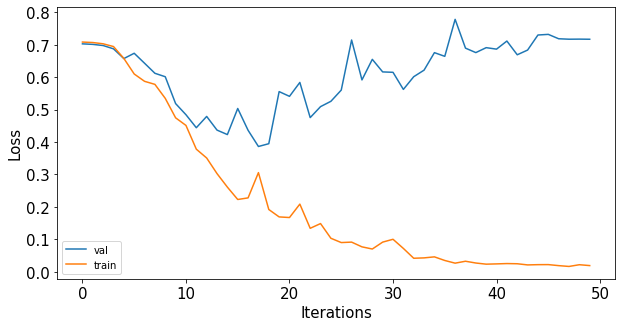

In [19]:
import matplotlib.pyplot as plt

val_acc = []
train_acc = []
for detail in history1:
    train_acc.append(detail['train_loss'])
    val_acc.append(detail['val_loss'])

plt.figure(figsize=(10,5))
#plt.title("Training and Validation Accuracy")
plt.plot(val_acc,label="val")
plt.plot(train_acc,label="train")
plt.xlabel("Iterations", size=15)
plt.ylabel("Loss", size=15)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.legend()
plt.show()
#plt.savefig('FC_curve.png')



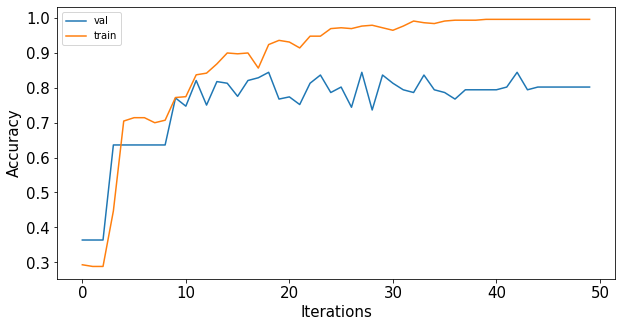

In [18]:
import matplotlib.pyplot as plt

val_acc = []
train_acc = []
for detail in history1:
    train_acc.append(detail['train_acc'])
    val_acc.append(detail['val_acc'])

plt.figure(figsize=(10,5))
#plt.title("Training and Validation Accuracy")
plt.plot(val_acc,label="val")
plt.plot(train_acc,label="train")
plt.xlabel("Iterations", size=15)
plt.ylabel("Accuracy", size=15)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.legend()
plt.show()
#plt.savefig('FC_curve.png')



In [178]:
history1

[{'val_loss': 0.7112954258918762,
  'val_acc': 0.26666666666666666,
  'train_loss': 0.7168548703193665,
  'train_acc': 0.25769927536231885,
  'lrs': [0.00011999999999999988,
   0.0001236689549612346,
   0.00013465712369145665]},
 {'val_loss': 0.7001469731330872,
  'val_acc': 0.26666666666666666,
  'train_loss': 0.7088065147399902,
  'train_acc': 0.24547101449275363,
  'lrs': [0.00015290851300153036,
   0.00017833011799512364,
   0.00021079239600034277]},
 {'val_loss': 0.6669110655784607,
  'val_acc': 0.7333333333333333,
  'train_loss': 0.6943021416664124,
  'train_acc': 0.39855072463768115,
  'lrs': [0.00025012992668949335,
   0.0002961422550231516,
   0.00034859491272309917]},
 {'val_loss': 0.5848948359489441,
  'val_acc': 0.7333333333333333,
  'train_loss': 0.6177797913551331,
  'train_acc': 0.7586050724637681,
  'lrs': [0.00040722061306892095,
   0.000471720612929868,
   0.0005417662350913717]},
 {'val_loss': 0.6800726652145386,
  'val_acc': 0.7333333333333333,
  'train_loss': 0.554

In [42]:
import sklearn.metrics

In [108]:
val_dl = DataLoader(val_ds, batch_size = 120, num_workers = 2, pin_memory = True)
val_loader = DeviceDataLoader(val_dl, device)
for state in val_loader:    
    #print(state[0].shape)
    pred = model1(state[0]).detach().numpy()
    cm=sklearn.metrics.confusion_matrix(state[1],pred > 0.5)
    print(cm)
#plt.imshow(cm, cmap='binary')

[[17  8]
 [12 64]]


In [113]:
train_dl_ = DataLoader(train_ds, batch_size = 600, num_workers = 2, pin_memory = True)
train_loader_ = DeviceDataLoader(train_dl_, device)
for state in train_loader_:    
    #print(state[0].shape)
    pred = model1(state[0]).detach().numpy()
    cm=sklearn.metrics.confusion_matrix(state[1],pred > 0.5)
    print(cm)
#plt.imshow(cm, cmap='binary')

[[117   0]
 [  2 281]]


In [114]:
wrong_sample = []
for sample, prediction, label in zip(state[0], pred, state[1]):
    if (prediction[0]>0.5) != label.item():
        wrong_sample.append((sample, prediction[0]))

In [62]:
wrong_sample

[tensor([0.0098, 0.1748, 0.3820,  ..., 0.0323, 0.1077, 0.1514]),
 tensor([0.0236, 0.2540, 0.3357,  ..., 0.0138, 0.0580, 0.1148])]

In [115]:
wrong_prog = []
wrong_nonprog = []
for sample, prediction in wrong_sample:
    for index, feature in enumerate(all_features):
        check = True
        for i in range(feature.shape[0]):
            if abs(feature[i] - sample[i]) >= 0.000001:
                check = False
                break
        if check:
            if song_names[index][13] == 'P':
                wrong_prog.append((song_names[index], prediction))
                #print(prediction)
            else:
                wrong_nonprog.append((song_names[index], 1-prediction))
                #print(1-prediction)
            #print(song_names[index])

In [74]:
wrong_nonprog

[('Prog_Dataset/Non_Progressive/Other_Songs/Cranberries - 04 - Zombie.mp3',
  0.9936984102241695),
 ('Prog_Dataset/Non_Progressive/Other_Songs/11 - Lonely People.mp3',
  0.7633778303861618),
 ('Prog_Dataset/Non_Progressive/Other_Songs/03 - No Doubt - Just a Girl.mp3',
  0.8436512500047684),
 ('Prog_Dataset/Non_Progressive/Other_Songs/06 - Sigur Rós - Sæglópur.mp3',
  0.6778866946697235),
 ('Prog_Dataset/Non_Progressive/Other_Songs/02 Aja.mp3', 0.9940750706009567),
 ('Prog_Dataset/Non_Progressive/Other_Songs/10 The Thrill Is Gone.mp3',
  0.8025485128164291),
 ('Prog_Dataset/Non_Progressive/Other_Songs/05-shock_the_monkey_320_lame_cbr.mp3',
  0.9573304168879986),
 ('Prog_Dataset/Non_Progressive/Other_Songs/Bad_Bunny_Si_Veo_A_Tu_Mama.mp3',
  0.9898659819737077),
 ('Prog_Dataset/Non_Progressive/Top_Of_The_Pops/1996_Alanis_Morissette_Ironic.mp3',
  0.9918111525475979),
 ('Prog_Dataset/Non_Progressive/Other_Songs/03-House Of The Rising Sun.mp3',
  0.9438552856445312),
 ('Prog_Dataset/Non_Pro

In [116]:
res_dict = []
for song, prediction in wrong_prog:
    res_dict.append({'Song names':song[25:], 'Probability for wrong class': prediction, 'True label': 'Prog'})
for song, prediction in wrong_nonprog:
    res_dict.append({'Song names':song[41:], 'Probability for wrong class': prediction, 'True label': 'Non-Prog'})

In [117]:
# name of csv file
import csv

filename = "FC_FD_Misclassification_Train.csv"
fields = ['Song names', 'Probability for wrong class', 'True label']
# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv dict writer object
    writer = csv.DictWriter(csvfile, fieldnames=fields)
 
    # writing headers (field names)
    writer.writeheader()
 
    # writing data rows
    writer.writerows(res_dict)

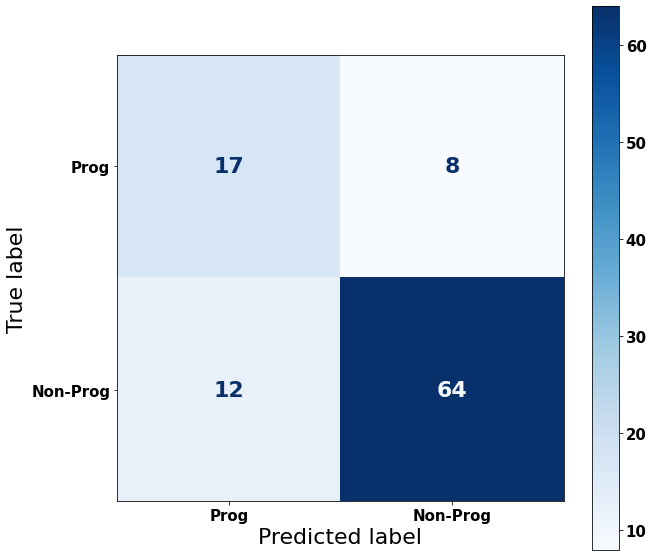

In [27]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Prog', 'Non-Prog'])

#cm_display.plot()
fig, ax = plt.subplots(figsize=(10,10))
font = {
    'weight' : 'bold',
    'size'   : 22}
plt.rc('font', **font)
cm_display.plot(ax=ax, cmap=plt.cm.Blues)

#plt.show()

In [220]:
print(model1)

FNN(
  (model): Sequential(
    (0): Linear(in_features=17088, out_features=5120, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=5120, out_features=1024, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=1024, out_features=512, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=512, out_features=64, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=64, out_features=1, bias=True)
  )
)


# Test

In [75]:
import glob
# Prepare a list for all the features and all the labels
all_features_test = []
all_labels_test = []

#genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
genres_path = "Prog_Dataset/Test/"
genres = ["Progressive", 'Non_Progressive']
# Extract features and genre names from each song
for genre in genres:
    sound_files = glob.glob(genres_path + genre + '/*')
    #print(sound_files)
    print('Processing %d songs in %s genre...' % (len(sound_files), genre))
    for i, song in enumerate(sound_files):
        if (song[-3:] == 'csv') or (song[-3:] == 'ods'):
            continue
        # Handle corrupt song 
        if 'jazz.00054.wav' in song:
            features = extract_features_song_get_means(sound_files[i - 1])
        else:
            features = extract_features_song_get_means(song)

        all_features_test.append(features)
        if genre == 'Progressive':
            all_labels_test.append(0)
        else:
            all_labels_test.append(1)

Processing 138 songs in Progressive genre...
Prog_Dataset/Test/Progressive/08 .3 1.m4a


/tmp/ipykernel_3468638/3771222143.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, _ = librosa.load(song)
/home/hoangngominh98/anaconda3/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


(17088,)
Prog_Dataset/Test/Progressive/01 - Red.mp3
(17088,)
Prog_Dataset/Test/Progressive/10.Elegy.mp3
(17088,)
Prog_Dataset/Test/Progressive/05 Awaken.mp3
(17088,)
Prog_Dataset/Test/Progressive/01. Diana.mp3
(17088,)
Prog_Dataset/Test/Progressive/03 Nectar.mp3
(17088,)
Prog_Dataset/Test/Progressive/10_Sorrow.mp3
(17088,)
Prog_Dataset/Test/Progressive/08 - I Spy.mp3
(17088,)
Prog_Dataset/Test/Progressive/05. Vrooom.mp3
(17088,)
Prog_Dataset/Test/Progressive/01. Ka$cade.mp3
(17088,)
Prog_Dataset/Test/Progressive/06. Part VI.mp3
(17088,)
Prog_Dataset/Test/Progressive/05 - Entree.mp3
(17088,)
Prog_Dataset/Test/Progressive/02 - Xanadu.mp3
(17088,)
Prog_Dataset/Test/Progressive/01-Stand By.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Test/Progressive/02_Freewill.mp3
(17088,)
Prog_Dataset/Test/Progressive/09_Lateralus.mp3
(17088,)
Prog_Dataset/Test/Progressive/15 Third Eye.mp3
(17088,)
Prog_Dataset/Test/Progressive/06. Hardcore.mp3
(17088,)
Prog_Dataset/Test/Progressive/08 - Voyager.mp3
(17088,)
Prog_Dataset/Test/Progressive/08 Los Endos.mp3
(17088,)
Prog_Dataset/Test/Progressive/07. ShutDOWN.mp3
(17088,)
Prog_Dataset/Test/Progressive/08 Dreamtime.mp3
(17088,)
Prog_Dataset/Test/Progressive/10 The Storm.mp3
(17088,)
Prog_Dataset/Test/Progressive/02 - Rubicon.mp3
(17088,)
Prog_Dataset/Test/Progressive/04_Birthright.mp3
(17088,)
Prog_Dataset/Test/Progressive/09_Time Flies.mp3
(17088,)
Prog_Dataset/Test/Progressive/11 - Stopa 11.mp3
(17088,)
Prog_Dataset/Test/Progressive/11. Jaguar God.mp3
(17088,)
Prog_Dataset/Test/Progressive/03. Little Man.mp3
(17088,)
Prog_Dataset/Test/Progressive/04 Clairvoyant.mp3
(17088,)
Prog_Dataset/Test/Progressive/04. Descending.mp3
(17088,)
Prog_Dataset/Test/Progressive

[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Test/Progressive/08 Heavy Horses.mp3
(17088,)
Prog_Dataset/Test/Progressive/01-Opening Move.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Test/Progressive/08 - Ebb & Flow.mp3
(17088,)
Prog_Dataset/Test/Progressive/12 - The Garden.mp3
(17088,)
Prog_Dataset/Test/Progressive/11 Strip The Soul.m4a


/tmp/ipykernel_3468638/3771222143.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, _ = librosa.load(song)
/home/hoangngominh98/anaconda3/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


(17088,)
Prog_Dataset/Test/Progressive/08 Rosetta Stoned.mp3
(17088,)
Prog_Dataset/Test/Progressive/02 - The Weirding.mp3
(17088,)
Prog_Dataset/Test/Progressive/04 - Running Hard.mp3
(17088,)
Prog_Dataset/Test/Progressive/02 April Ethereal.mp3
(17088,)
Prog_Dataset/Test/Progressive/02. Time Is Monet.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Test/Progressive/04 - No Part Of Me.mp3
(17088,)
Prog_Dataset/Test/Progressive/11 - On That Note.flac
(17088,)
Prog_Dataset/Test/Progressive/01. Oblivion_khaos.mp3
(17088,)
Prog_Dataset/Test/Progressive/07 The Cinema Show.mp3
(17088,)
Prog_Dataset/Test/Progressive/04 Master Builder.flac
(17088,)
Prog_Dataset/Test/Progressive/09 - Quantum Factor.mp3
(17088,)
Prog_Dataset/Test/Progressive/01. Machine Messiah.mp3
(17088,)
Prog_Dataset/Test/Progressive/05.Harvest_of_Souls.mp3
(17088,)
Prog_Dataset/Test/Progressive/03. Egoist Hedonist.mp3
(17088,)
Prog_Dataset/Test/Progressive/05 - Jurassic Shift.mp3
(17088,)
Prog_Dataset/Test/Progressive/04-Anyone's Daughter.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Test/Progressive/08 Suite Sister Mary.mp3
(17088,)
Prog_Dataset/Test/Progressive/07. Escalator Shrine.mp3
(17088,)
Prog_Dataset/Test/Progressive/01 - Nothing At Best.mp3
(17088,)
Prog_Dataset/Test/Progressive/07 - Chimera’s Wreck.mp3
(17088,)
Prog_Dataset/Test/Progressive/13 - Beyond the Pale.mp3
(17088,)
Prog_Dataset/Test/Progressive/02 - Song for America.mp3
(17088,)
Prog_Dataset/Test/Progressive/103 Thela Hun Ginjeet.mp3
(17088,)
Prog_Dataset/Test/Progressive/02_Pictures_Of_A_City.mp3
(17088,)
Prog_Dataset/Test/Progressive/03 Sartori In Tangier.mp3
(17088,)
Prog_Dataset/Test/Progressive/01 Prologue - Autumn.flac
(17088,)
Prog_Dataset/Test/Progressive/05_Turn of the Century.mp3
(17088,)
Prog_Dataset/Test/Progressive/05. Bortglömda Gårdar.flac
(17088,)
Prog_Dataset/Test/Progressive/05. Guardian Of My Soul.mp3
(17088,)
Prog_Dataset/Test/Progressive/1 robert wyatt SEA SONG.mp3
(17088,)
Prog_Dataset/Test/Progressive/06  Ashes Are  Burning .mp3
(17088,)
Prog_Dataset/

[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Test/Progressive/06 The Main Monkey Business.mp3
(17088,)
Prog_Dataset/Test/Progressive/Thrak-King Crimson-06-THRAK.mp3
(17088,)
Prog_Dataset/Test/Progressive/08. Towards The Blue Horizon.mp3
(17088,)
Prog_Dataset/Test/Progressive/01 - Assault & Battery Part I.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Test/Progressive/08. Visions -remastered 2017-.mp3
(17088,)
Prog_Dataset/Test/Progressive/06-Happy Nightmare (Mescaline).mp3
(17088,)
Prog_Dataset/Test/Progressive/Opeth - Serenity Painted Death.mp3
(17088,)
Prog_Dataset/Test/Progressive/09 - The World We Used to Know.mp3
(17088,)
Prog_Dataset/Test/Progressive/Duke-Genesis-11-Duke's Travels.mp3
(17088,)
Prog_Dataset/Test/Progressive/The Gathering - 09 - Saturnine.mp3
(17088,)
Prog_Dataset/Test/Progressive/06 - The Storm Before the Calm.mp3
(17088,)
Prog_Dataset/Test/Progressive/03. Aquarium -remastered 2017-.mp3
(17088,)
Prog_Dataset/Test/Progressive/11 Architects of Consciousness.mp3
(17088,)
Prog_Dataset/Test/Progressive/07 - The Final Thing On My Mind.mp3
(17088,)
Prog_Dataset/Test/Progressive/08_The_Devil's_Triangle_Part_II.mp3
(17088,)
Prog_Dataset/Test/Progressive/04-In The Land Of Grey And Pink.mp3
(17088,)
Prog_Dataset/Test/Progressive/02_The Revealing Science of God.mp3
(17088,)
Prog_Dataset/Test/Progress

[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Test/Progressive/04. Selkies- The Endless Obsession.mp3
(17088,)
Prog_Dataset/Test/Progressive/01 Dream Theater - The Glass Prison.mp3
(17088,)
Prog_Dataset/Test/Progressive/07_Genesis_The Fountain of Salmacis.mp3
(17088,)
Prog_Dataset/Test/Progressive/MIKE OLDFIELD - Part One (Ommadawn).mp3


Note: Illegal Audio-MPEG-Header 0x41475061 at offset 23269468.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(17088,)
Prog_Dataset/Test/Progressive/101-marillion-the_invisible_man-sns.mp3
(17088,)
Prog_Dataset/Test/Progressive/02. This Film Might Change Your Life.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Test/Progressive/Barclay James Harvest - Mocking Bird.mp3
(17088,)
Prog_Dataset/Test/Progressive/101-emerson_lake_and_palmer-jerusalem.mp3
(17088,)
Prog_Dataset/Test/Progressive/06. Native Construct - Chromatic Lights.mp3
(17088,)
Prog_Dataset/Test/Progressive/05-Son Of There's No Place Like Homerton.mp3
(17088,)
Prog_Dataset/Test/Progressive/08_-_shadow_of_the_hierophant_320_lame_cbr.mp3
(17088,)
Prog_Dataset/Test/Progressive/19 - Islands (Live at The Egg, Albany, NY).mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Test/Progressive/King Crimson - Islands - 02 - Sailor's Tale.mp3
(17088,)
Prog_Dataset/Test/Progressive/The Dear Hunter - 06 - A Night on the Town.flac
(17088,)
Prog_Dataset/Test/Progressive/Wind & Wuthering-Genesis-02-One For the Vine.mp3
(17088,)
Prog_Dataset/Test/Progressive/01 Cirkus (including Entry of the Chameleons).mp3
(17088,)
Prog_Dataset/Test/Progressive/08 - Spectral Mornings (2005 Digital Remaster).mp3
(17088,)
Prog_Dataset/Test/Progressive/01 - Atom Heart Mother Suite (2011 - Remaster).mp3
(17088,)
Prog_Dataset/Test/Progressive/01 - Beyond the Threshold, Pt. I (Helios Awakens).mp3
(17088,)
Prog_Dataset/Test/Progressive/06-duel_of_the_jester_and_the_tyrant_320_lame_cbr.mp3
(17088,)
Prog_Dataset/Test/Progressive/The Power To Believe-King Crimson-08-Dangerous Curves.mp3
(17088,)
Prog_Dataset/Test/Progressive/03 Starship Trooper- Life Seeker , Disillusion , Wurm.flac
(17088,)
Prog_Dataset/Test/Progressive/1 - 09 - Steve Hackett - Can-Utility And The Coas

[src/libmpg123/layer3.c:INT123_do_layer3():1841] error: dequantization failed!


(17088,)
Prog_Dataset/Test/Non_Progressive/03 - Cirice.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/03 Madazulu.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/02 Paranoid.m4a


/tmp/ipykernel_3468638/3771222143.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, _ = librosa.load(song)
/home/hoangngominh98/anaconda3/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


(17088,)
Prog_Dataset/Test/Non_Progressive/03. Teardrop.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/07 By Myself.m4a


/tmp/ipykernel_3468638/3771222143.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, _ = librosa.load(song)
/home/hoangngominh98/anaconda3/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


(17088,)
Prog_Dataset/Test/Non_Progressive/03 Katy Song.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/02. Cover Me.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/08 - Kollaps.wma


/tmp/ipykernel_3468638/3771222143.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, _ = librosa.load(song)
/home/hoangngominh98/anaconda3/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


(17088,)
Prog_Dataset/Test/Non_Progressive/02 That's All.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/06 - Physical.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/into the void.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/01 Jacqueline.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/05-Territories.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/03. Tessellate.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/Chelsea Dagger.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/01 - Bolo Hari.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/06 - Video Girl.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/03 - King Ghost.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/09 - Dilettante.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/01_Mind Ecology.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/09 Ascot Gavotte.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/02 Sweet Lullaby.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/03 - Mikrokosmos.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/01 - Djobi Djoba.mp3


[src/libmpg123/id3.c:process_extra():681] error: No extra frame text / valid description?


(17088,)
Prog_Dataset/Test/Non_Progressive/08 - Old Strings.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/01 - Highway Star.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/03 Boys Don't Cry.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/05 - In Your Eyes.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/13 - Neodammerung.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/1-01 It's Not Over.m4a


/tmp/ipykernel_3468638/3771222143.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, _ = librosa.load(song)
/home/hoangngominh98/anaconda3/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


(17088,)
Prog_Dataset/Test/Non_Progressive/04 Boy In The Moon.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/07_Sinister Grains.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/03-Sweet Blindness.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/Bauhaus - Mask - 02.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/09 Do You Realize--.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/05 - Hey Lawdy Mama.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/07 - Speed Of Sound.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/Radiohead - Spectre.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/03 - Of These, Hope.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/03_vicious_delicious.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/04 - Song of Destiny.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/02 I Can Do Anything.m4a


/tmp/ipykernel_3468638/3771222143.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, _ = librosa.load(song)
/home/hoangngominh98/anaconda3/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


(17088,)
Prog_Dataset/Test/Non_Progressive/05.King of Hollywood.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/Beethoven_Symphony_5.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/Jerusalem-the Anthem.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/22 - Dear Mr. Fantasy.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/11 - Terraplane Blues.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/01 - Run Away With Me.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/02-Heart Full Of Soul.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/10-Music And Politics.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/07 Keep An Eye On Dan.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/01 - Beds Are Burning.mp3


[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


(17088,)
Prog_Dataset/Test/Non_Progressive/01 Dance Yrself Clean.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/01 Penguin Cafe Single.mp3


[src/libmpg123/id3.c:INT123_parse_new_id3():1086] error: Whoa! ID3v2 frame claims to be larger than the whole rest of the tag.


(17088,)
Prog_Dataset/Test/Non_Progressive/09 - Intimate Grandeur.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/01_Mere Sapnon Ki Rani.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/03 Sweet Talkin' Woman.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/01-Life's Greatest Fool.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/01 - Heat Of The Moment.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/55. Rosalía - Malamente.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/01 - Another Day Of Sun.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/A Dream In Red Mansions.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/06 - Between Love & Hate.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/08 - You Make Loving Fun.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/03 I Am a God (feat. God).m4a


/tmp/ipykernel_3468638/3771222143.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, _ = librosa.load(song)
/home/hoangngominh98/anaconda3/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


(17088,)
Prog_Dataset/Test/Non_Progressive/04-Fade Away (And Radiate).mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/08 - When the Levee Breaks.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/05 - The Time And The Test.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/06_The Offspring_Gone Away.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/08 - Supersonic Rocket Ship.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/03 - What the Water Gave Me.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/02 Voulez-Vous Abba 320kbps.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/01. Owner Of A Lonely Heart.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/The Legend Of Ashitaka Theme.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/02. Untitled 02 (06.23.2014).mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/03 - Three Ragas in 'D' Minor.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/03.-DJ-Snake---Let-Me-Love-You.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/06 TITO PUENTE-HONG KONG MAMBO.mp3
(17088,)
Prog_Datas

Note: Illegal Audio-MPEG-Header 0x00000000 at offset 6074356.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(17088,)
Prog_Dataset/Test/Non_Progressive/11 variations on a cocktail dress.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/07 - Signals (Orchestrion Sketch).mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/13 - Porcelina of the Vast Oceans.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/03 Nightmares On Wax - Pipes Honour.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/01 the american metaphysical circus.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/01 Everyone's At It (Album Version).mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/01 - Prelude and The Sound of Music.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/05 - The Temple On the Edge of Time.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/05. Ancestress (feat. Sindri Eldon).mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/21Henry Mancini - Baby Elephant Walk.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/06 Angel Tears - Inshalla (Ya Salam).mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/01 - Nina Simone -  - Be My Husband .mp3
(17088,

[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?
/tmp/ipykernel_3468638/3771222143.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, _ = librosa.load(song)
/home/hoangngominh98/anaconda3/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


(17088,)
Prog_Dataset/Test/Non_Progressive/02. Death Cab for Cutie - Soul Meets Body.ogg
(17088,)
Prog_Dataset/Test/Non_Progressive/15 Sprawl II (Mountains Beyond Mountains).mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/05-miles_runs_the_voodoo_down_320_lame_cbr.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/2 - Arctic Monkeys - One Point Perspective.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/06.-Jax-Jones-feat.-RAYE--You-Don't-Know-Me.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/02-tears_for_fears-the_tipping_point-68bb3466.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/08-oneohtrix_point_never-computer_vision-kouala.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/Oingo-Boingo---Weird-Science-(Extended-Dance-Mix).mp3


Note: Illegal Audio-MPEG-Header 0x69726420 at offset 6205317.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


(17088,)
Prog_Dataset/Test/Non_Progressive/Kiss Me, Kiss Me, Kiss Me-The Cure-07-The Snakepit.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/Sufjan Stevens - The Age of Adz - 11 Impossible Soul.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/John Williams-The Phantom Menace-0 - Duel of the Fates.mp3


Note: Illegal Audio-MPEG-Header 0x20202020 at offset 4065165.
Note: Trying to resync...
Note: Skipped 1024 bytes in input.
[src/libmpg123/parse.c:wetwork():1365] error: Giving up resync after 1024 bytes - your stream is not nice... (maybe increasing resync limit could help).
/tmp/ipykernel_3468638/3771222143.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, _ = librosa.load(song)
/home/hoangngominh98/anaconda3/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


(17088,)
Prog_Dataset/Test/Non_Progressive/01  The Last Shadow Puppets - The Age Of The Understatement.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/05 - Nick Cave & The Bad Seeds - Fifteen Feet Of Pure White Snow.mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/06 Marvins Room - Buried Alive (Interlude) (Feat. Kendrick Lamar).mp3
(17088,)
Prog_Dataset/Test/Non_Progressive/Gustav Mahler - Symphony no.3 - 06 - Langsam--Ruhevoll--Empfunden.flac
(17088,)
Prog_Dataset/Test/Non_Progressive/15 - Mussorgsky - Pictures at an Exhibition (orch. Ravel)- The Great Gate at Kiev.flac
(17088,)


In [76]:
features_test=np.stack(all_features_test)
labels_test=np.stack(all_labels_test)
features_test = features_test.astype('float32')
labels_test = labels_test.astype('int64')
features_tensor_test = torch.from_numpy(features_test)
labels_tensor_test = torch.from_numpy(labels_test)
dataset_test = TensorDataset(features_tensor_test, labels_tensor_test)
test_dl = DataLoader(dataset_test, batch_size = 267, num_workers = 2, pin_memory = True)
test_loader = DeviceDataLoader(test_dl, device)

In [107]:
for state in test_loader:    
    #print(state[0].shape)
    pred = model1(state[0]).detach().numpy()
    cm=sklearn.metrics.confusion_matrix(state[1],pred > 0.5)
    print(cm)

[[ 91  45]
 [ 16 115]]


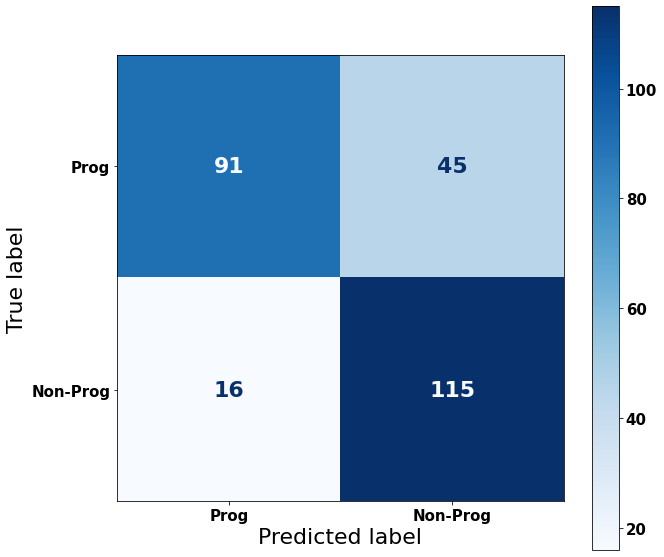

In [86]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Prog', 'Non-Prog'])

#cm_display.plot()
fig, ax = plt.subplots(figsize=(10,10))
font = {
    'weight' : 'bold',
    'size'   : 22}
plt.rc('font', **font)
cm_display.plot(ax=ax, cmap=plt.cm.Blues)


In [79]:
(91+115)/(91+115+16+45)

0.7715355805243446

In [242]:
(121+77)/(121+77+54+15)

0.7415730337078652

In [88]:
import glob
# Prepare a list for all the features and all the labels
song_names_test = []

#genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
genres_path = "Prog_Dataset/Test/"
genres = ["Progressive", 'Non_Progressive']
# Extract features and genre names from each song
for genre in genres:
    sound_files = glob.glob(genres_path + genre + '/*')
    #print(sound_files)
    print('Processing %d songs in %s genre...' % (len(sound_files), genre))
    for i, song in enumerate(sound_files):
        if (song[-3:] == 'csv') or (song[-3:] == 'ods'):
            continue
        # Handle corrupt song 
        song_names_test.append(song)

Processing 138 songs in Progressive genre...
Processing 133 songs in Non_Progressive genre...


In [89]:
wrong_sample_test = []
for sample, prediction, label in zip(state[0].numpy(), pred, state[1]):
    if (prediction[0]>0.5) != label.item():
        wrong_sample_test.append((sample, prediction[0]))

In [96]:
wrong_prog_test = []
wrong_nonprog_test = []
for sample, prediction in wrong_sample_test:
    for index, feature in enumerate(all_features_test):
        check = True
        for i in range(feature.shape[0]):
            if abs(feature[i] - sample[i]) >= 0.000001:
                check = False
                break
        if check:
            if song_names_test[index][18] == 'P':
                #print(feature[50], sample[50])
                wrong_prog_test.append((song_names_test[index], prediction))
                #print(prediction)
            else:
                wrong_nonprog_test.append((song_names_test[index], 1-prediction))
                #print(1-prediction)
    #break
            #print(song_names[index])

In [98]:
wrong_prog_test

[('Prog_Dataset/Test/Progressive/01 - Red.mp3', 0.9964959),
 ('Prog_Dataset/Test/Progressive/01. Diana.mp3', 0.99546623),
 ('Prog_Dataset/Test/Progressive/10_Sorrow.mp3', 0.9991617),
 ('Prog_Dataset/Test/Progressive/08 - I Spy.mp3', 0.82958865),
 ('Prog_Dataset/Test/Progressive/02_Freewill.mp3', 0.89174616),
 ('Prog_Dataset/Test/Progressive/15 Third Eye.mp3', 0.95043784),
 ('Prog_Dataset/Test/Progressive/04_Birthright.mp3', 0.97781247),
 ('Prog_Dataset/Test/Progressive/11. Jaguar God.mp3', 0.841949),
 ('Prog_Dataset/Test/Progressive/03. Little Man.mp3', 0.9999757),
 ('Prog_Dataset/Test/Progressive/01. Simple Boy.mp3', 0.9989899),
 ('Prog_Dataset/Test/Progressive/05 - Ouroboros.mp3', 0.9982754),
 ('Prog_Dataset/Test/Progressive/05 - Stargazers.mp3', 0.99960905),
 ('Prog_Dataset/Test/Progressive/02 - The Weirding.mp3', 0.9999999),
 ('Prog_Dataset/Test/Progressive/04 - Running Hard.mp3', 0.9986981),
 ('Prog_Dataset/Test/Progressive/02 April Ethereal.mp3', 0.6559908),
 ('Prog_Dataset/Test/

In [99]:
res_dict = []
for song, prediction in wrong_prog_test:
    res_dict.append({'Song names':song[30:], 'Probability for wrong class': prediction, 'True label': 'Prog'})
for song, prediction in wrong_nonprog_test:
    res_dict.append({'Song names':song[34:], 'Probability for wrong class': prediction, 'True label': 'Non-Prog'})

In [100]:
# name of csv file
import csv

filename = "FC_FD_Misclassification_Test.csv"
fields = ['Song names', 'Probability for wrong class', 'True label']
# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv dict writer object
    writer = csv.DictWriter(csvfile, fieldnames=fields)
 
    # writing headers (field names)
    writer.writeheader()
 
    # writing data rows
    writer.writerows(res_dict)

In [80]:
import glob
# Prepare a list for all the features and all the labels
all_features_test_2 = []
all_labels_test_2 = []

#genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
genres_path = "Prog_Dataset/Test/"
genres = ["Other"]
# Extract features and genre names from each song
for genre in genres:
    sound_files = glob.glob(genres_path + genre + '/*')
    #print(sound_files)
    print('Processing %d songs in %s genre...' % (len(sound_files), genre))
    for i, song in enumerate(sound_files):
        if (song[-3:] == 'csv') or (song[-3:] == 'ods'):
            continue
        # Handle corrupt song 
        if 'jazz.00054.wav' in song:
            features = extract_features_song_get_means(sound_files[i - 1])
        else:
            features = extract_features_song_get_means(song)

        all_features_test_2.append(features)
        if genre == 'Progressive':
            all_labels_test_2.append(0)
        else:
            all_labels_test_2.append(1)

Processing 22 songs in Other genre...
Prog_Dataset/Test/Other/01 Arithmophobia.mp3
(17088,)
Prog_Dataset/Test/Other/PERIPHERY - Zyglrox.mp3
(17088,)
Prog_Dataset/Test/Other/Meshuggah- Soul Burn.mp3
(17088,)
Prog_Dataset/Test/Other/06 A Light Will Shine.mp3
(17088,)
Prog_Dataset/Test/Other/05. Physical Education.mp3
(17088,)
Prog_Dataset/Test/Other/SikTh - Hold My Finger.mp3
(17088,)
Prog_Dataset/Test/Other/Veil Of Maya - Punisher.mp3
(17088,)
Prog_Dataset/Test/Other/CHIMP SPANNER - Bad Code.mp3
(17088,)
Prog_Dataset/Test/Other/The Algorithm - Isometry.mp3
(17088,)
Prog_Dataset/Test/Other/01-darko_us-splinter_cell.mp3
(17088,)
Prog_Dataset/Test/Other/03 - Language II Conspire.mp3
(17088,)
Prog_Dataset/Test/Other/MONUMENTS - I, The Creator.mp3
(17088,)
Prog_Dataset/Test/Other/HEART OF A COWARD - Hollow.mp3
(17088,)
Prog_Dataset/Test/Other/BORN OF OSIRIS - Divergency.mp3
(17088,)
Prog_Dataset/Test/Other/Hacktivist - DECEIVE AND DEFY.mp3
(17088,)
Prog_Dataset/Test/Other/07 The Race Is Abou

In [81]:
features_test_2=np.stack(all_features_test_2)
labels_test_2=np.stack(all_labels_test_2)
features_test_2 = features_test_2.astype('float32')
labels_test_2 = labels_test_2.astype('int64')
features_tensor_test_2 = torch.from_numpy(features_test_2)
labels_tensor_test_2 = torch.from_numpy(labels_test_2)
dataset_test_2 = TensorDataset(features_tensor_test_2, labels_tensor_test_2)
test_dl_2 = DataLoader(dataset_test_2, batch_size = 267, num_workers = 2, pin_memory = True)
test_loader_2 = DeviceDataLoader(test_dl_2, device)

In [101]:
for state in test_loader_2:    
    #print(state[0].shape)
    pred = model1(state[0]).detach().numpy()
    cm=sklearn.metrics.confusion_matrix(state[1],pred > 0.5)
    print(cm)

[[ 0  0]
 [ 4 18]]


In [102]:
import glob
# Prepare a list for all the features and all the labels
song_names_2 = []

#genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
genres_path = "Prog_Dataset/Test/"
genres = ["Other"]
# Extract features and genre names from each song
for genre in genres:
    sound_files = glob.glob(genres_path + genre + '/*')
    #print(sound_files)
    print('Processing %d songs in %s genre...' % (len(sound_files), genre))
    for i, song in enumerate(sound_files):
        if (song[-3:] == 'csv') or (song[-3:] == 'ods'):
            continue
        # Handle corrupt song 
        song_names_2.append(song)

Processing 22 songs in Other genre...


In [103]:
song_list = []
for sample, prediction in zip(state[0].numpy(), pred):
    if (prediction[0]>0.5):
        song_list.append((sample, 0))
    else:
        song_list.append((sample, 1))

In [104]:
res_dict_2 = []
for sample, prediction in song_list:
    for index, feature in enumerate(all_features_test_2):
        check = True
        for i in range(feature.shape[0]):
            if abs(feature[i] - sample[i]) >= 0.0000001:
                check = False
                break
        if check:
            if prediction == 0:
                res_dict_2.append({'Song names': song_names_2[index][24:], 'Predicted label': 'Prog'})
                #print(prediction)
            else:
                res_dict_2.append({'Song names': song_names_2[index][24:], 'Predicted label': 'Non-Prog'})
                #print(1-prediction)
    #break
            #print(song_names[index])

In [106]:
res_dict_2

[{'Song names': '01 Arithmophobia.mp3', 'Predicted label': 'Prog'},
 {'Song names': 'PERIPHERY - Zyglrox.mp3', 'Predicted label': 'Non-Prog'},
 {'Song names': 'Meshuggah- Soul Burn.mp3', 'Predicted label': 'Prog'},
 {'Song names': '06 A Light Will Shine.mp3', 'Predicted label': 'Prog'},
 {'Song names': '05. Physical Education.mp3', 'Predicted label': 'Prog'},
 {'Song names': 'SikTh - Hold My Finger.mp3', 'Predicted label': 'Non-Prog'},
 {'Song names': 'Veil Of Maya - Punisher.mp3', 'Predicted label': 'Prog'},
 {'Song names': 'CHIMP SPANNER - Bad Code.mp3', 'Predicted label': 'Non-Prog'},
 {'Song names': 'The Algorithm - Isometry.mp3', 'Predicted label': 'Prog'},
 {'Song names': '01-darko_us-splinter_cell.mp3', 'Predicted label': 'Prog'},
 {'Song names': '03 - Language II Conspire.mp3', 'Predicted label': 'Prog'},
 {'Song names': 'MONUMENTS - I, The Creator.mp3', 'Predicted label': 'Prog'},
 {'Song names': 'HEART OF A COWARD - Hollow.mp3', 'Predicted label': 'Prog'},
 {'Song names': 'BO

In [105]:
# name of csv file
import csv

filename = "FC_FD_PostProg_Prediction.csv"
fields = ['Song names', 'Predicted label']
# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv dict writer object
    writer = csv.DictWriter(csvfile, fieldnames=fields)
 
    # writing headers (field names)
    writer.writeheader()
 
    # writing data rows
    writer.writerows(res_dict_2)